# Loan Prediction Analysis

Dream Housing Finance, a leading provider of home loans with a wide-reaching presence across urban, semi-urban, and rural areas, is aiming to revolutionize their loan eligibility process. Customers currently apply for a home loan, after which the company manually validates their eligibility. To enhance efficiency and deliver instant decisions, Dream Housing Finance seeks to automate this process in real-time using data provided in the online application. Key customer details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more will be used to create a model that identifies customer segments eligible for loans. This approach will enable the company to target the right customers more effectively, streamlining operations and improving customer experience.

# 1. Importing the modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 2. Loading the Dataset

In [5]:
df = pd.read_csv("Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 3. Preprocessing the Data

In [9]:
# Finding the null values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Fill the missing values for numerical data using the mean.
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())


In [17]:
# Impute the missing values for categorical data using the mode.
df['Gender'] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [18]:
# Rechecking for any remaining null values.s
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#  4.Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

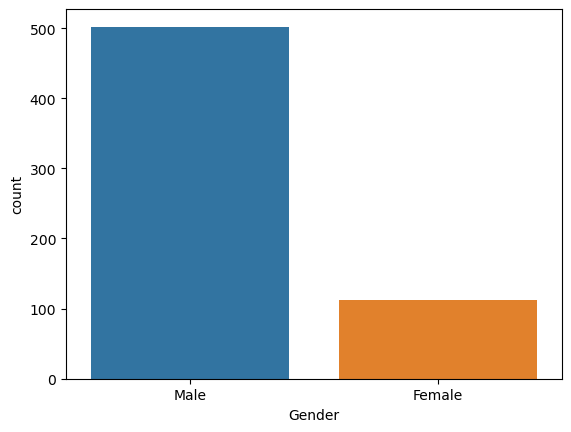

In [19]:
# Visualization of categorical attributes.

sns.countplot(x=df["Gender"])

<Axes: xlabel='Married', ylabel='count'>

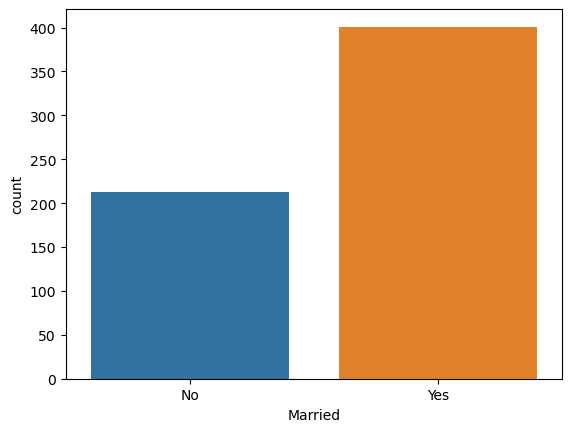

In [20]:
sns.countplot(x=df["Married"])

<Axes: xlabel='Dependents', ylabel='count'>

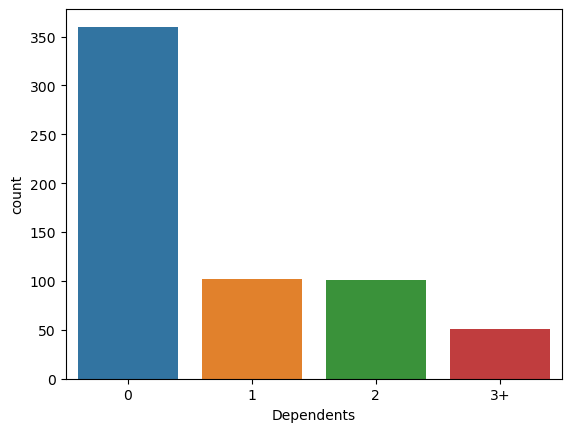

In [21]:
sns.countplot(x=df["Dependents"])

<Axes: xlabel='Education', ylabel='count'>

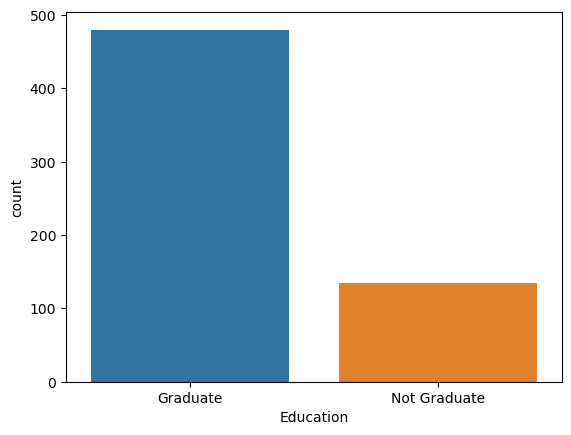

In [22]:
sns.countplot(x=df["Education"])

<Axes: xlabel='Self_Employed', ylabel='count'>

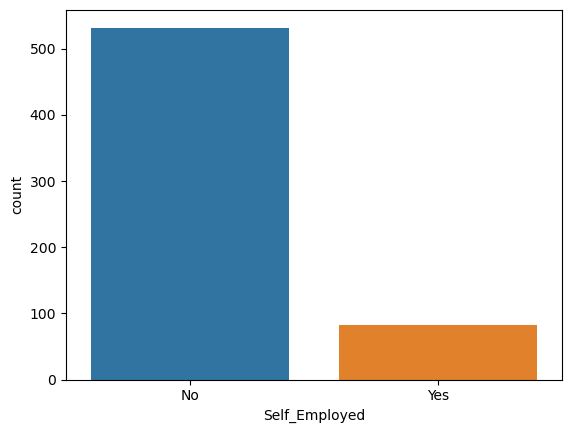

In [23]:
sns.countplot(x=df["Self_Employed"])

<Axes: xlabel='Property_Area', ylabel='count'>

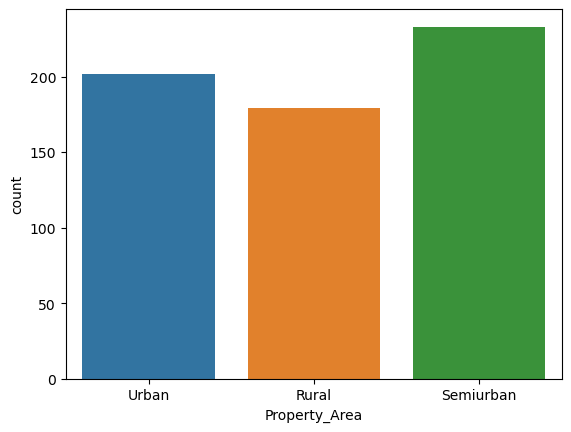

In [24]:
sns.countplot(x=df["Property_Area"])

<Axes: xlabel='Loan_Status', ylabel='count'>

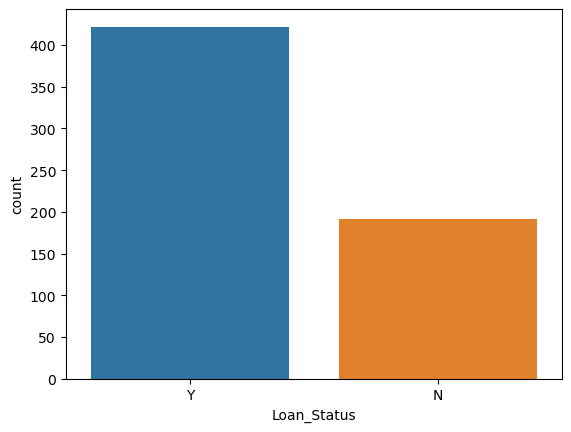

In [25]:
sns.countplot(x=df["Loan_Status"])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

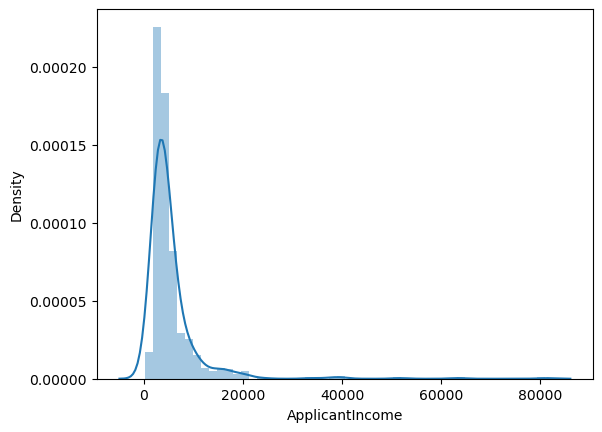

In [28]:
# Visualization of numerical attributes.

sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

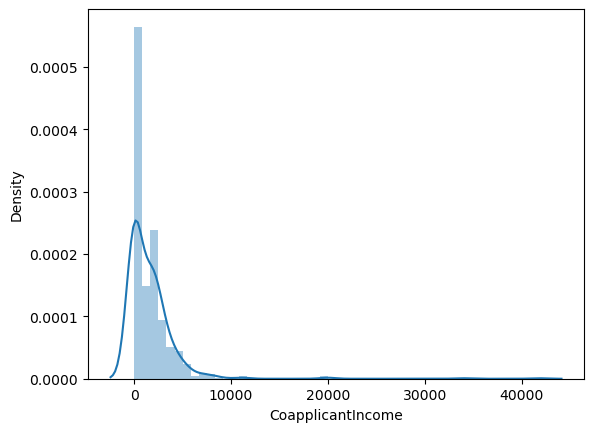

In [30]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

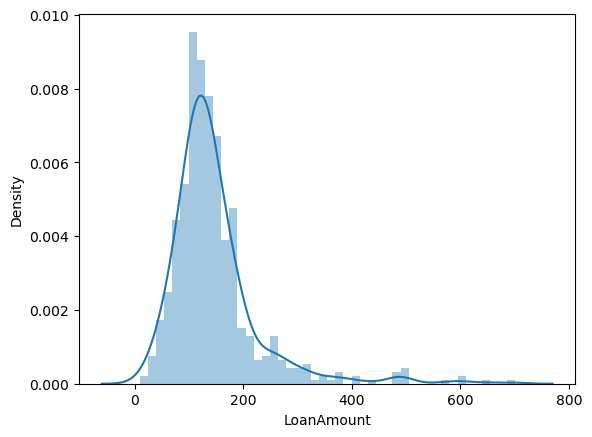

In [33]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

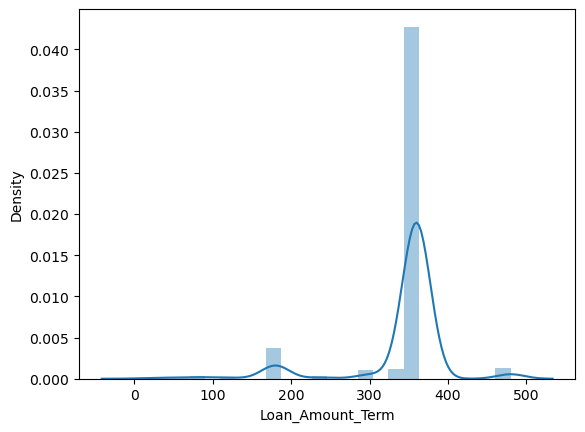

In [34]:
sns.distplot(df["Loan_Amount_Term"])

<Axes: xlabel='Credit_History', ylabel='Density'>

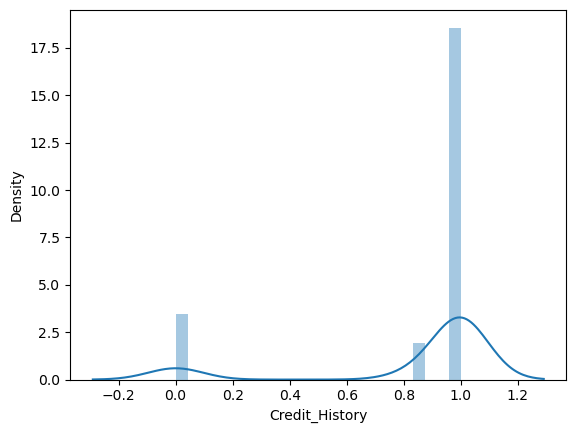

In [36]:
sns.distplot(df["Credit_History"])

# 5. Creation of new Attribute for finding the Total Income

In [38]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

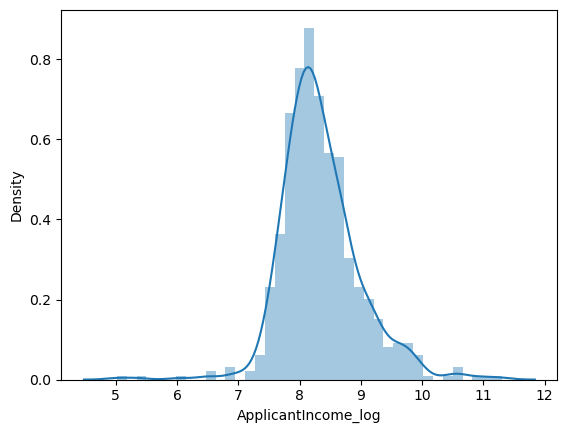

In [44]:
# Applying log transformation to the attributes
df["ApplicantIncome_log"] = np.log(df["ApplicantIncome"]+1)
sns.distplot(df["ApplicantIncome_log"])

<Axes: xlabel='CoapplicantIncome_log', ylabel='Density'>

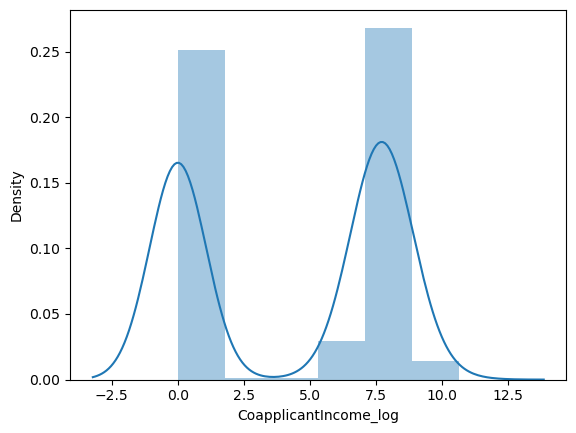

In [45]:
df["CoapplicantIncome_log"] = np.log(df["CoapplicantIncome"]+1)
sns.distplot(df["CoapplicantIncome_log"])

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

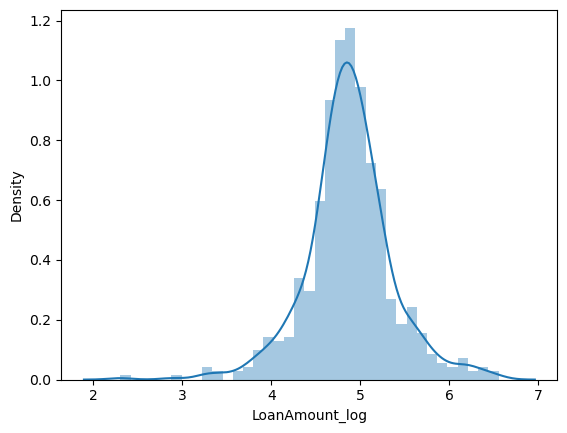

In [46]:
df["LoanAmount_log"]  = np.log(df["LoanAmount"]+1)
sns.distplot(df["LoanAmount_log"])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

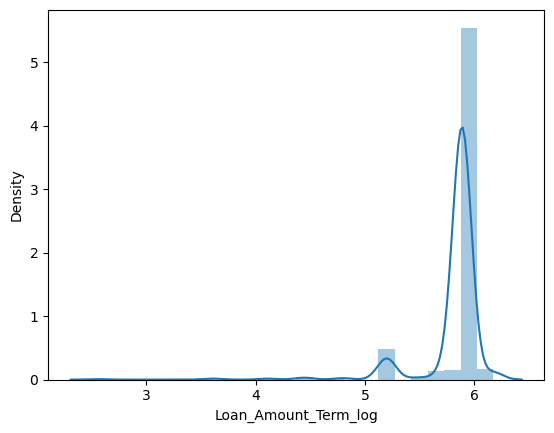

In [48]:
df["Loan_Amount_Term_log"] = np.log(df["Loan_Amount_Term"]+1)
sns.distplot(df["Loan_Amount_Term_log"])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

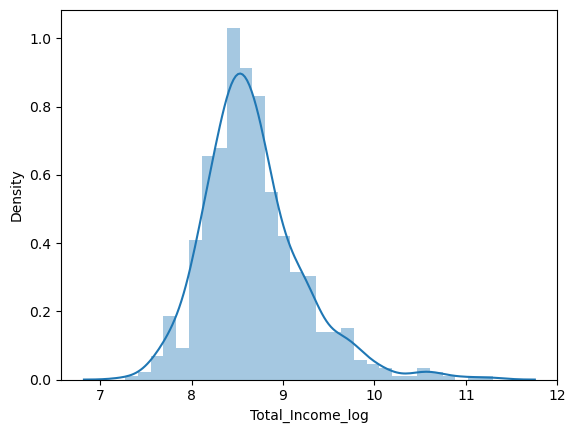

In [49]:
df["Total_Income_log"] = np.log(df["Total_Income"]+1)
sns.distplot(df["Total_Income_log"])

<Axes: >

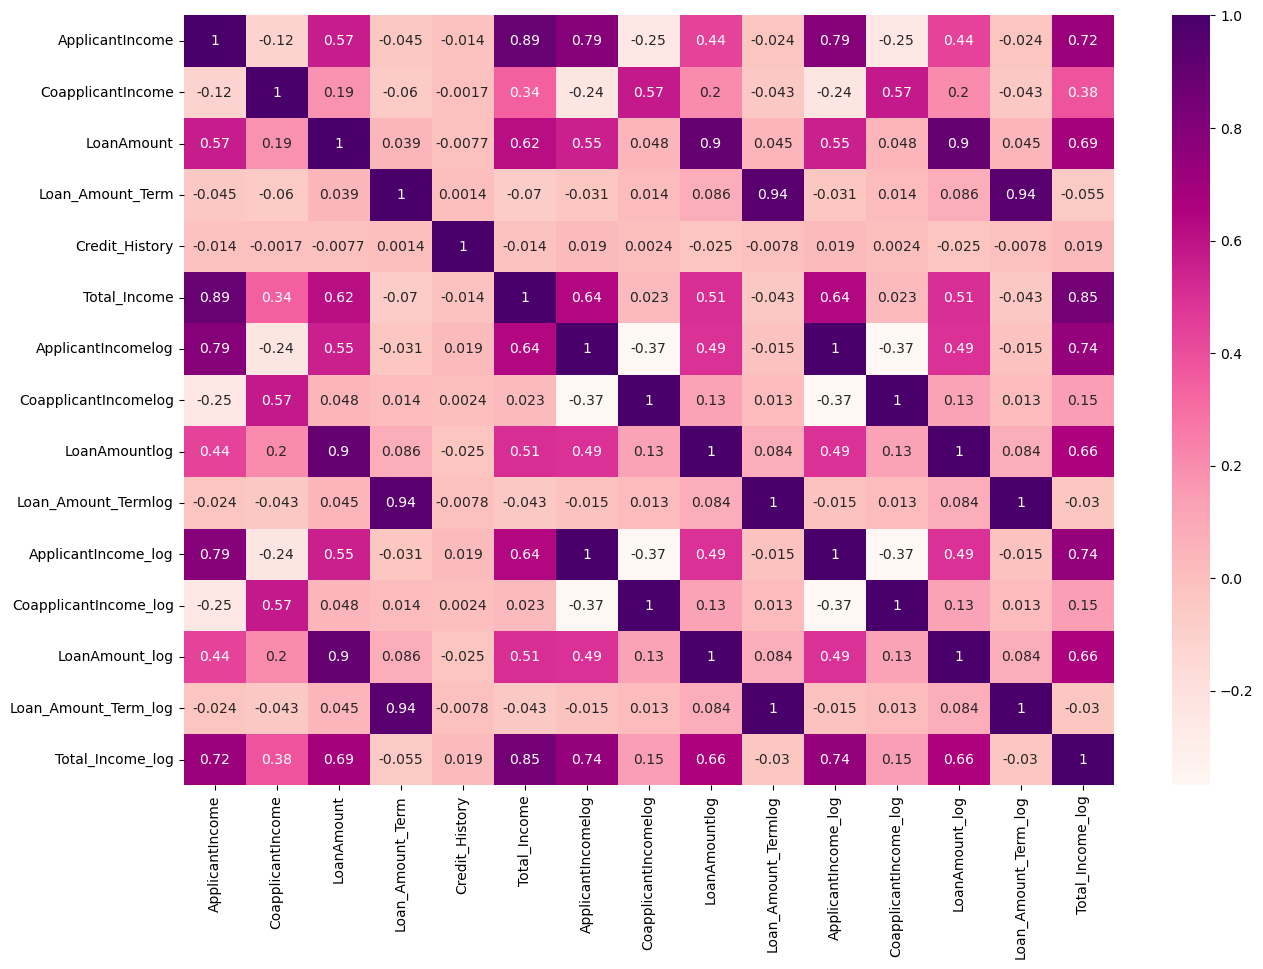

In [50]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = "RdPu")


In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Total_Income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,6091.0,8.430327,7.319202,4.859812,5.888878,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,4941.0,7.857094,7.765993,4.795791,5.888878,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681,0.000000,4.955827,5.888878,8.699681


In [54]:
# Remove redundant columns.
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term","Total_Income","Loan_ID","CoapplicantIncome_log"]
df  =df.drop(columns = cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,8.699681,4.955827,5.888878,8.699681


# 6. Label Encoding


In [129]:
# label encoding is a technique used to convert categorical data into numerical data so that the algorithms can process it.

In [57]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
LE = LabelEncoder()
for col in cols:
    df[col] = LE.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,0.000000,4.993232,5.888878,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,7.319202,4.859812,5.888878,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,0.000000,4.204693,5.888878,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,7.765993,4.795791,5.888878,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,0.000000,4.955827,5.888878,8.699681,4.955827,5.888878,8.699681


# 7.  Defining the input and output attributes.


In [91]:
x = df.drop(columns= ["Loan_Status"], axis=1)
y = df["Loan_Status"]

# 8. Train_Test_Split


In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

# 9. Model Training

In [105]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy score is: ",model.score(x_test,y_test)*100)
    score = cross_val_score(model, x,y)
    print("Cross Validation is: ",np.mean(score)*100)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy score is:  78.91891891891892
Cross Validation is:  80.78368652538984


# 10. Using Decision Tree -- Classification


In [116]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy score is:  73.51351351351352
Cross Validation is:  73.94242303078768


# 11. Using Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy score is:  78.91891891891892
Cross Validation is:  78.01412768226044


In [120]:
model = ExtraTreesClassifier()
classify(model, x,y)

Accuracy score is:  74.05405405405405
Cross Validation is:  77.69159003065441


# 12. Hyperparameter Tuning 

In [122]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 25, max_depth=7,max_features=1)
classify(model,x,y)

Accuracy score is:  74.05405405405405
Cross Validation is:  77.03718512594962


# 13. Confusion Matrix

In [ ]:
# Confusion Matrix-- provides the summary of prediction results on a classification problem.

In [128]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 30,  35],
       [  6, 114]], dtype=int64)

#  14. Plots

<Axes: >

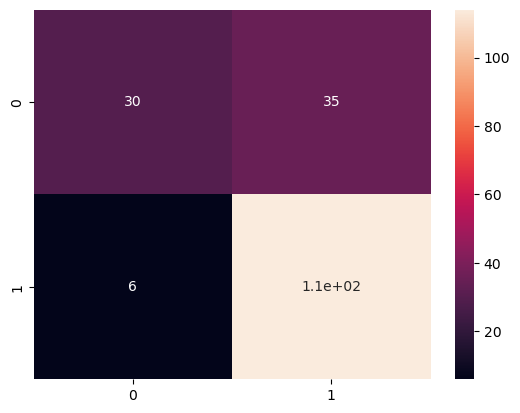

In [127]:
sns.heatmap(cm, annot = True)